In [1]:
import math
from math import sqrt
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
loan= pd.read_csv("loan_test.csv")

In [3]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
#we print names of columns
loan.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [5]:
#print(type(loan.loc[35,'LoanAmount']))
#if pd.isna(loan.loc[35,'LoanAmount']):
#    print("+1")
#loan.loc[0,'LoanAmount']=-1
##print(type(loan.loc[0,'Loan_Id']))

In [6]:
#loan=loan.fillna(0)

In [7]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
#loan.drop("Status New", inplace=True, axis=1)

In [9]:
#loan.head(10)

In [10]:
#loan["Gender"]=loan["Gender"].astype(int)
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
#loan=loan.astype(int)

In [12]:
loan["Gender"].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [13]:
loan["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [14]:
#loan['Married'][104]
#loan['Married_bool'][104]

In [15]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
loan["total_income"]=loan["ApplicantIncome"]+loan["CoapplicantIncome"]

#converting different categorical/object values to float/int here it is float value
loan['Gender_bool']=loan['Gender'].map({'Female':0,'Male':1})
loan['Married_bool']=loan['Married'].map({'No':0,'Yes':1})
loan['Education_bool']=loan['Education'].map({'Not Graduate':0,'Graduate':1})
loan['Self_Employed_bool']=loan['Self_Employed'].map({'No':0,'Yes':1})
loan['Property_Area_bool']=loan['Property_Area'].map({'Rural':0,'Urban':2, 'Semiurban':1})
loan['Status_New']=loan['Loan_Status'].map({'N':0,'Y':1})
#filling missing values with mode for caTEGORICAL TYPE of columns
loan['Married_bool']=loan['Married_bool'].fillna(loan['Married_bool'].mode()[0])
loan['Self_Employed_bool']=loan['Self_Employed_bool'].fillna(loan['Self_Employed_bool'].mode()[0])
loan['Gender_bool']=loan['Gender_bool'].fillna(loan['Gender_bool'].mode()[0])
loan['Dependents']=loan['Dependents'].fillna(loan['Dependents'].mode()[0])

#loan['Education_bool']=loan['Education_bool'].fillna(loan['Education_bool'].mode()[0])
#loan['Property_Area_bool']=loan['Property_Area_bool'].fillna(loan['Property_Area_bool'].mode()[0])

In [17]:
loan.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents             0
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
total_income           0
Gender_bool            0
Married_bool           0
Education_bool         0
Self_Employed_bool     0
Property_Area_bool     0
Status_New             0
dtype: int64

In [18]:
loan.drop("Gender", inplace=True, axis=1)
loan.drop("Married", inplace=True, axis=1)
loan.drop("Education", inplace=True, axis=1)
loan.drop("Self_Employed", inplace=True, axis=1)
loan.drop("Property_Area", inplace=True, axis=1)
loan.drop("Loan_Status", inplace=True, axis=1)

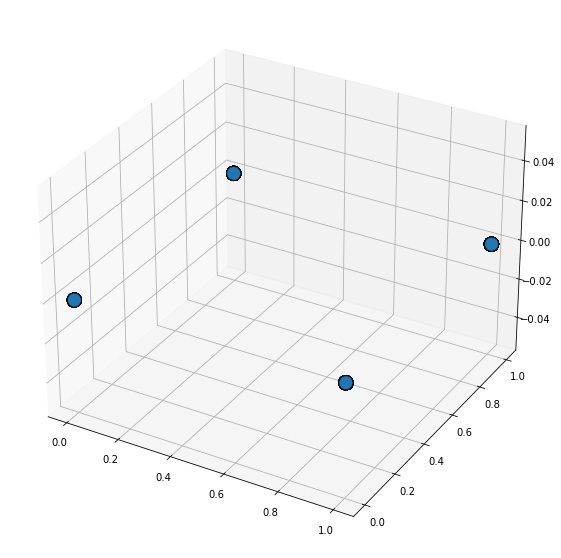

In [19]:
#since we have to predict loan eligibilty, we'll check dependency of each variable by plotting its curve
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(loan.Gender_bool,loan.Status_New ,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200)

plt.show()

In [20]:
loan["Dependents"].replace("3+", 3,inplace=True)
loan["CoapplicantIncome"]=loan["CoapplicantIncome"].fillna(loan["CoapplicantIncome"].median())
loan["LoanAmount"]=loan["LoanAmount"].fillna(loan["LoanAmount"].median())
loan["Loan_Amount_Term"]=loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].median())
loan["Credit_History"]=loan["Credit_History"].fillna(loan["Credit_History"].mode()[0])
loan.head(10)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income,Gender_bool,Married_bool,Education_bool,Self_Employed_bool,Property_Area_bool,Status_New
0,LP001002,0,5849,0.0,128.0,360.0,1.0,5849.0,1.0,0.0,1,0.0,2,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,6091.0,1.0,1.0,1,0.0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,3000.0,1.0,1.0,1,1.0,2,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,4941.0,1.0,1.0,0,0.0,2,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,6000.0,1.0,0.0,1,0.0,2,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,9613.0,1.0,1.0,1,1.0,2,1
6,LP001013,0,2333,1516.0,95.0,360.0,1.0,3849.0,1.0,1.0,0,0.0,2,1
7,LP001014,3,3036,2504.0,158.0,360.0,0.0,5540.0,1.0,1.0,1,0.0,1,0
8,LP001018,2,4006,1526.0,168.0,360.0,1.0,5532.0,1.0,1.0,1,0.0,2,1
9,LP001020,1,12841,10968.0,349.0,360.0,1.0,23809.0,1.0,1.0,1,0.0,1,0


In [21]:

loan.drop("ApplicantIncome", inplace=True, axis=1)
loan.drop("CoapplicantIncome", inplace=True, axis=1)

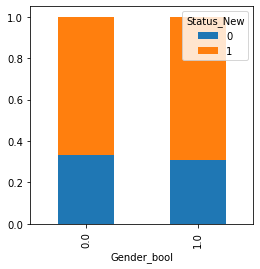

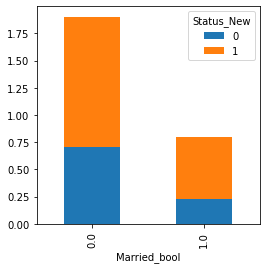

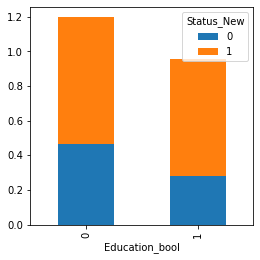

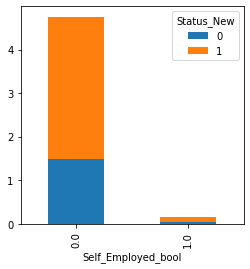

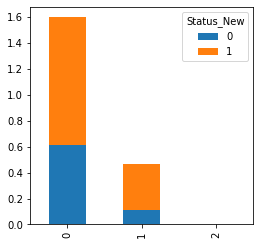

In [22]:
Gender=pd.crosstab(loan["Gender_bool"],loan["Status_New"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Married=pd.crosstab(loan["Married_bool"],loan["Status_New"])
Married.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Education=pd.crosstab(loan["Education_bool"],loan["Status_New"])
Education.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Self_Employed=pd.crosstab(loan["Self_Employed_bool"],loan["Status_New"])
Self_Employed.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Property_Area=pd.crosstab(loan["Property_Area_bool"],loan["Status_New"])
Property_Area.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [23]:
loan.isnull().sum()
loan.head()

,Loan_ID,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,total_income,Gender_bool,Married_bool,Education_bool,Self_Employed_bool,Property_Area_bool,Status_New
0,LP001002,0,128.0,360.0,1.0,5849.0,1.0,0.0,1,0.0,2,1
1,LP001003,1,128.0,360.0,1.0,6091.0,1.0,1.0,1,0.0,0,0
2,LP001005,0,66.0,360.0,1.0,3000.0,1.0,1.0,1,1.0,2,1
3,LP001006,0,120.0,360.0,1.0,4941.0,1.0,1.0,0,0.0,2,1
4,LP001008,0,141.0,360.0,1.0,6000.0,1.0,0.0,1,0.0,2,1


In [24]:
loan.drop("Gender_bool", inplace=True, axis=1)

In [25]:
def calc_sigmoid(z):
    p=1/(1+ np.exp(-z))
    p=np.minimum(p, 0.9999)
    p = np.maximum(p, 0.0001)
    #print("value of sigmoid", p)
    return p

In [26]:
def calc_cost_func(theta,x):
    #print(np.shape(theta_0), np.shape(np.transpose(x)))
    #print(np.shape(np.dot(theta,np.transpose(x))))
    y=np.dot(theta,np.transpose(x))
    
    #print("sigmoid:",calc_sigmoid(y))
    return calc_sigmoid(y)

In [27]:
def calc_error(y_pred, y_label):
    len_label=len(y_label)
    cost= (-y_label*np.log(y_pred) - (1-y_label)*np.log(1-y_pred)).sum()/len_label
    return cost

In [28]:
def gradient_descent(y_pred,y_label,x, learning_rate, theta):
    len_label=len(y_label)
    J= (-(np.dot(np.transpose(x),(y_label-y_pred)))/len_label)
    theta-= learning_rate*J
    #print("theta_0 shape: ",np.shape(theta),np.shape(J))

    return theta
    
    

In [29]:
def train(y_label,x, learning_rate, theta, iterations):
    list_cost=[]
    for i in range(iterations):
        y_pred=calc_cost_func(theta,x)
        
        theta=gradient_descent(y_pred,y_label,x, learning_rate, theta)
        if i%100==0:
            print("\n iteration",i)
            print("y_label:",y_pred)
            print("theta:",theta)
    
        cost=calc_error(y_pred, y_label)
        list_cost.append(cost)
    print("final cost list: ",list_cost)
    return theta,list_cost,y_pred

In [30]:
print(loan["Dependents"])

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object


In [31]:
##################################
#commands used for testing

#convert pd dataframe column values into numpy array

#arr=loan.loc[:,"Dependents"].values
#arr=arr.astype(float)
#type(arr[0])

#collect columns into single np array as feasture vector
#arr=loan.iloc[:, 1:5].values
#arr=arr.astype(float)
#type(arr[0][1])

#create fealure vector
#feat=loan.iloc[:, 1:5].values
#feat=feat.astype(float)

#vect=np.array([1,2,3,4])
#print(np.transpose(vect))
#print(len(np.dot(np.transpose(vect),np.transpose(feat))))
###########################

In [32]:
'''
    theta: array(1,no. of features)
    theta_0: array(1,length of data)
    x: array(no. of features, length of data)
    y_label, y_pred: array(length of data)
'''

x_label=loan.iloc[:500, 1:10].values

x_rows, x_columns= x_label.shape

z = np.ones((x_rows,1), dtype=float)

x_label=np.append(x_label,z,axis=1)

x_label=x_label.astype(float)

y_label=loan.loc[:499,"Status_New" ].values

y_label=y_label.astype(float)

#theta=np.array([0.0005,0.000000000455547,0.0000000222203,0.00000006005,0.0000000022505,0.00000000025059,0.000000002585,0.0025500049,0.0034,0.0068])
theta=np.array([2.0,0.08,0.04,1.0,0.002,3.0,3.0,1.0,2.0,4.0])

#learning_rate=0.0000004,0.004,0.007
theta,cost,y_pred=train(y_label,x_label,0.0000004,theta,2000)


 iteration 0
y_label: [0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999
 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.99


 iteration 200
y_label: [9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 1.00000000e-04 9.99900000e-01 9.99900000e-01
 9.87083810e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.06171820e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.91988581e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 4.17469581e-04 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.29093756e-03 9.99333874e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99607839e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.82273982e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.81426965e-01 9.99900000e-01

y_label: [9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 1.00000000e-04 9.99900000e-01 9.99900000e-01
 9.88779464e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 8.58980333e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.90306475e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 1.00584209e-03 9.99900000e-01
 9.99900000e-01 9.99900000e-01 1.14485621e-02 9.98270901e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99859192e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99635053e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.82129688e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.82604481e-01 9.99900000e-01
 9.99900000e-01

 9.99900000e-01 1.48212369e-01 9.99900000e-01 6.30904343e-03]
theta: [ 1.99996920e+00  7.50310545e-02  2.36515932e-02  9.99983483e-01
 -3.38864618e-03  2.99997464e+00  2.99997433e+00  9.99996723e-01
  1.99995094e+00  3.99995623e+00]

 iteration 700
y_label: [9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 1.00000000e-04 9.99900000e-01 9.99900000e-01
 9.91274139e-01 9.99821457e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 7.60174384e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.87589664e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 3.91851465e-03 9.99900000e-01
 9.99900000e-01 9.99900000e-01 1.62860556e-02 9.93046105e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.9990000

  1.99992619e+00  3.99993495e+00]

 iteration 1000
y_label: [9.99818248e-01 9.99863162e-01 9.99900000e-01 9.99900000e-01
 9.99888179e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 1.00000000e-04 9.99900000e-01 9.99900000e-01
 9.93336768e-01 9.99115418e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99597952e-01 9.99900000e-01
 6.29791978e-01 9.99900000e-01 9.99835356e-01 9.99709276e-01
 9.99900000e-01 9.84483941e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 1.51626216e-02 9.99900000e-01
 9.99900000e-01 9.99900000e-01 2.35151625e-02 9.73476183e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99845716e-01
 9.99900000e-01 9.99900000e-01 9.99719288e-01 9.99900000e-01
 9.99900000e-01 9.98498778e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99732100e-01 9.99900000e-01
 9.99900000e-01 9.99870608e-01 9.83409020e-01 9.99900000e-01
 9.99900000e-01 9.9990000


 iteration 1200
y_label: [9.99581493e-01 9.99700358e-01 9.99900000e-01 9.99900000e-01
 9.99745045e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 1.00000000e-04 9.99900000e-01 9.99900000e-01
 9.94289311e-01 9.97472451e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.98860480e-01 9.99896566e-01
 5.28265192e-01 9.99900000e-01 9.99509145e-01 9.99266583e-01
 9.99900000e-01 9.81723686e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99779610e-01 9.99900000e-01 3.49654846e-02 9.99900000e-01
 9.99900000e-01 9.99900000e-01 2.92067667e-02 9.37509732e-01
 9.99900000e-01 9.99900000e-01 9.99900000e-01 9.99671742e-01
 9.99900000e-01 9.99900000e-01 9.99413368e-01 9.99900000e-01
 9.99809993e-01 9.96756639e-01 9.99900000e-01 9.99900000e-01
 9.99889637e-01 9.99900000e-01 9.99752733e-01 9.99900000e-01
 9.99900000e-01 9.99680325e-01 9.83598540e-01 9.99900000e-01
 9.99875074e-01 9.99900000e-01 9.87221532e-01 9.99900000e-0

 iteration 1400
y_label: [9.99063299e-01 9.99361671e-01 9.99900000e-01 9.99839488e-01
 9.99434647e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99900000e-01 1.00000000e-04 9.99900000e-01 9.99900000e-01
 9.95163144e-01 9.93022698e-01 9.99900000e-01 9.99883360e-01
 9.99900000e-01 9.99768233e-01 9.96873035e-01 9.99784667e-01
 4.29841221e-01 9.99900000e-01 9.98583854e-01 9.98205275e-01
 9.99900000e-01 9.78832398e-01 9.99900000e-01 9.99900000e-01
 9.99853693e-01 9.99789400e-01 9.99900000e-01 9.99900000e-01
 9.99396987e-01 9.99841691e-01 7.84636738e-02 9.99900000e-01
 9.99900000e-01 9.99900000e-01 3.66142787e-02 8.63304663e-01
 9.99900000e-01 9.99824937e-01 9.99900000e-01 9.99320171e-01
 9.99836852e-01 9.99900000e-01 9.98808963e-01 9.99900000e-01
 9.99599978e-01 9.93190655e-01 9.99857281e-01 9.99900000e-01
 9.99664709e-01 9.99900000e-01 9.99774245e-01 9.99900000e-01
 9.99900000e-01 9.99232974e-01 9.84012844e-01 9.99900000e-01
 9.99748096e-01 9.99900000e-01 9.88103141e-01 9.99900000e-01

 iteration 1600
y_label: [9.98020658e-01 9.98716164e-01 9.99900000e-01 9.99596183e-01
 9.98816348e-01 9.99900000e-01 9.99833502e-01 9.99900000e-01
 9.99900000e-01 1.00000000e-04 9.99900000e-01 9.99900000e-01
 9.96148561e-01 9.81910068e-01 9.99900000e-01 9.99704661e-01
 9.99854959e-01 9.99272177e-01 9.91912043e-01 9.99576669e-01
 3.49865472e-01 9.99900000e-01 9.96141868e-01 9.95854615e-01
 9.99864052e-01 9.76898271e-01 9.99831427e-01 9.99900000e-01
 9.99342800e-01 9.99558991e-01 9.99900000e-01 9.99862811e-01
 9.98440717e-01 9.99623548e-01 1.76086254e-01 9.99900000e-01
 9.99900000e-01 9.99900000e-01 4.85996510e-02 7.37764110e-01
 9.99746834e-01 9.99419384e-01 9.99900000e-01 9.98670969e-01
 9.99584966e-01 9.99900000e-01 9.97716139e-01 9.99900000e-01
 9.99204785e-01 9.86543623e-01 9.99539596e-01 9.99900000e-01
 9.99036769e-01 9.99900000e-01 9.99806333e-01 9.99900000e-01
 9.99900000e-01 9.98262048e-01 9.85326393e-01 9.99900000e-01
 9.99520422e-01 9.99900000e-01 9.89264022e-01 9.99761132e-01


 iteration 1800
y_label: [9.96167361e-01 9.97636184e-01 9.99900000e-01 9.99063846e-01
 9.97730413e-01 9.99900000e-01 9.99533290e-01 9.99900000e-01
 9.99900000e-01 1.00000000e-04 9.99900000e-01 9.99900000e-01
 9.97269860e-01 9.57314816e-01 9.99900000e-01 9.99310901e-01
 9.99753623e-01 9.97877987e-01 9.80832724e-01 9.99237876e-01
 2.97281607e-01 9.99900000e-01 9.90321247e-01 9.91211138e-01
 9.99768393e-01 9.77300683e-01 9.99616888e-01 9.99900000e-01
 9.97229060e-01 9.99153116e-01 9.99900000e-01 9.99570889e-01
 9.96282614e-01 9.99176066e-01 3.81805813e-01 9.99900000e-01
 9.99900000e-01 9.99893020e-01 7.16784730e-02 5.76841277e-01
 9.99270336e-01 9.98206819e-01 9.99900000e-01 9.97623891e-01
 9.99025684e-01 9.99710806e-01 9.95980378e-01 9.99900000e-01
 9.98552457e-01 9.75775442e-01 9.98621264e-01 9.99866791e-01
 9.97441665e-01 9.99900000e-01 9.99852434e-01 9.99900000e-01
 9.99876964e-01 9.96386320e-01 9.87938592e-01 9.99900000e-01
 9.99164826e-01 9.99900000e-01 9.90881552e-01 9.99439288e-0

final cost list:  [2.8552745187628816, 2.8552745187628816, 2.8552745187628816, 2.8401306903117227, 2.8674409136662127, 2.8910736816536584, 2.869294759059014, 2.840890346184008, 2.81832594018694, 2.8135915675614225, 2.8151211641102956, 2.8147477576585627, 2.815978499176046, 2.816977688225862, 2.8160341963336304, 2.8152092185786985, 2.8143968492412363, 2.8136471923834883, 2.8131074966275262, 2.812617247661727, 2.8121441630109434, 2.811670542755697, 2.811259431007391, 2.8109134705236656, 2.8106128257306238, 2.8103438356524926, 2.810097032682693, 2.80986582026385, 2.8096455859328926, 2.8094330956067086, 2.809226076796566, 2.809022930281445, 2.8088225294118705, 2.8086240798430673, 2.808427021208238, 2.8082309580412055, 2.808035611170891, 2.807840783481753, 2.807646335774626, 2.807452169738627, 2.807258215934272, 2.8070644253106973, 2.806870763216434, 2.8066772051700033, 2.806483733873098, 2.8062903371010615, 2.806097006212941, 2.805903735099126, 2.80571051943802, 2.805517356171037, 2.805324

In [33]:
#loan.iloc[:,1:10]
#calc_sigmoid(np.array([2,3,4,5]))
#y_pred[189]
#type(y_label)

In [34]:
def classify(y_test):
    return np.around(y_test)

In [35]:
def predict(x_test,theta):
    y_test=np.dot(theta,np.transpose(x_test))
    #print(y_test)
    p=calc_sigmoid(y_test)
    print(p)
    return p

#for calculating accuracy based on validation set
'''
    Description of variables:
    x_test:numpy array (no. of rows in dataset, no. of features/columns)
    z_test: is added as column in x_test for the purpose of theta_0
    y_label_test: actual labels
    y_test= numpy array of probability (note: these are probabilities NOT classes)
    y_test_pred_labels= numpy array of classes based of probability (note: here it is classes NOT probability)

'''
x_test=loan.iloc[500:, 1:10].values
x_rows_test, x_columns_test= x_test.shape
z_test = np.ones((x_rows_test,1), dtype=float)
x_test=np.append(x_test,z_test,axis=1)
y_label_test=loan.loc[500:,"Status_New" ].values

y_label_test=y_label_test.astype(float)
x_test=x_test.astype(float)
y_test=predict(x_test,theta)
y_test_pred_labels=classify(y_test)

[8.33722871e-01 9.98246844e-01 9.97881991e-01 4.26039548e-02
 9.88224729e-01 9.99900000e-01 1.00000000e-04 9.99309591e-01
 9.99900000e-01 1.00000000e-04 1.23070247e-01 9.99900000e-01
 9.99900000e-01 1.99340731e-01 9.96430181e-01 9.99900000e-01
 9.99900000e-01 9.71208338e-01 9.94249710e-01 6.37657138e-01
 9.95342060e-01 9.91412646e-01 9.98874101e-01 9.99900000e-01
 7.69846272e-01 9.80437695e-01 9.99849144e-01 9.87914967e-01
 9.67317991e-01 1.54978393e-01 9.99741990e-01 9.99900000e-01
 9.99221663e-01 2.56208897e-01 1.00000000e-04 5.62129987e-01
 9.99900000e-01 9.99900000e-01 8.34945480e-01 9.99900000e-01
 9.99515101e-01 9.99281927e-01 9.99160444e-01 9.99882454e-01
 9.95818770e-01 9.99610615e-01 9.94780484e-01 9.93302582e-01
 8.81455361e-01 9.92096357e-01 9.98444196e-01 9.92228899e-01
 9.99900000e-01 9.99900000e-01 7.93295808e-01 5.59405334e-01
 9.94268845e-01 9.99900000e-01 9.98855812e-01 9.99718963e-01
 9.99900000e-01 9.99900000e-01 9.94298480e-01 7.88391147e-01
 9.99900000e-01 9.572271

In [36]:
print(y_test_pred_labels)
print(y_label_test)
count=0
for i in range(len(y_label_test)):
    if y_label_test[i]!=y_test_pred_labels[i]:
        count+=1
print(count)

[1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
37


In [37]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_label_test,y_test_pred_labels)

print(score)

0.6754385964912281


In [38]:
from scipy.interpolate import make_interp_spline, BSpline
total_iters=np.arange(0,2000,1,dtype=float)

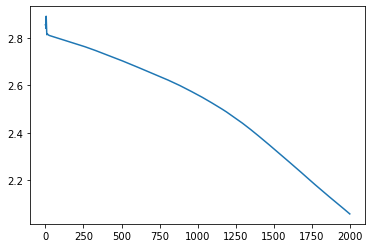

In [39]:
plt.plot(total_iters,cost)
plt.show()

In [40]:
loan.head()


,Loan_ID,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,total_income,Married_bool,Education_bool,Self_Employed_bool,Property_Area_bool,Status_New
0,LP001002,0,128.0,360.0,1.0,5849.0,0.0,1,0.0,2,1
1,LP001003,1,128.0,360.0,1.0,6091.0,1.0,1,0.0,0,0
2,LP001005,0,66.0,360.0,1.0,3000.0,1.0,1,1.0,2,1
3,LP001006,0,120.0,360.0,1.0,4941.0,1.0,0,0.0,2,1
4,LP001008,0,141.0,360.0,1.0,6000.0,0.0,1,0.0,2,1


In [41]:
'''

    test data set is being imported
    converting the test dataframe in the same format as train dataframe

'''

'\n\n    test data set is being imported\n    converting the test dataframe in the same format as train dataframe\n\n'

In [42]:
test_data_df=pd.read_csv("loan_test_file.csv")

In [43]:
test_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [44]:
test_data_df["total_income"]=test_data_df["ApplicantIncome"]+test_data_df["CoapplicantIncome"]

#converting different categorical/object values to float/int here it is float value
test_data_df['Gender_bool']=test_data_df['Gender'].map({'Female':0,'Male':1})
test_data_df['Married_bool']=test_data_df['Married'].map({'No':0,'Yes':1})
test_data_df['Education_bool']=test_data_df['Education'].map({'Not Graduate':0,'Graduate':1})
test_data_df['Self_Employed_bool']=test_data_df['Self_Employed'].map({'No':0,'Yes':1})
test_data_df['Property_Area_bool']=test_data_df['Property_Area'].map({'Rural':0,'Urban':2, 'Semiurban':1})

#filling missing values with mode for caTEGORICAL TYPE of columns
test_data_df['Married_bool']=test_data_df['Married_bool'].fillna(test_data_df['Married_bool'].mode()[0])
test_data_df['Self_Employed_bool']=test_data_df['Self_Employed_bool'].fillna(loan['Self_Employed_bool'].mode()[0])
test_data_df['Gender_bool']=test_data_df['Gender_bool'].fillna(test_data_df['Gender_bool'].mode()[0])
test_data_df['Dependents']=test_data_df['Dependents'].fillna(test_data_df['Dependents'].mode()[0])

test_data_df["Dependents"].replace("3+", 3,inplace=True)
test_data_df["CoapplicantIncome"]=test_data_df["CoapplicantIncome"].fillna(test_data_df["CoapplicantIncome"].median())
test_data_df["LoanAmount"]=test_data_df["LoanAmount"].fillna(test_data_df["LoanAmount"].median())
test_data_df["Loan_Amount_Term"]=test_data_df["Loan_Amount_Term"].fillna(test_data_df["Loan_Amount_Term"].median())
test_data_df["Credit_History"]=test_data_df["Credit_History"].fillna(test_data_df["Credit_History"].mode()[0])

In [45]:
test_data_df.drop("Gender", inplace=True, axis=1)
test_data_df.drop("Married", inplace=True, axis=1)
test_data_df.drop("Education", inplace=True, axis=1)
test_data_df.drop("Self_Employed", inplace=True, axis=1)
test_data_df.drop("Property_Area", inplace=True, axis=1)

test_data_df.drop("Gender_bool", inplace=True, axis=1)


In [46]:
test_data_df.drop("ApplicantIncome", inplace=True, axis=1)
test_data_df.drop("CoapplicantIncome", inplace=True, axis=1)


In [47]:
test_data_df.iloc[:,1:10]=test_data_df.iloc[:,1:10].astype(float)
test_data_df.head()

,Loan_ID,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,total_income,Married_bool,Education_bool,Self_Employed_bool,Property_Area_bool
0,LP001015,0.0,110.0,360.0,1.0,5720.0,1.0,1.0,0.0,2.0
1,LP001022,1.0,126.0,360.0,1.0,4576.0,1.0,1.0,0.0,2.0
2,LP001031,2.0,208.0,360.0,1.0,6800.0,1.0,1.0,0.0,2.0
3,LP001035,2.0,100.0,360.0,1.0,4886.0,1.0,1.0,0.0,2.0
4,LP001051,0.0,78.0,360.0,1.0,3276.0,0.0,0.0,0.0,2.0


In [48]:
test_feat=test_data_df.iloc[:, 1:10].values
test_feat_rows, test_feat_columnns= test_feat.shape
z_test_feat = np.ones((test_feat_rows,1), dtype=float)
test_feat=np.append(test_feat,z_test_feat,axis=1)
print(test_feat)

[[  0. 110. 360. ...   0.   2.   1.]
 [  1. 126. 360. ...   0.   2.   1.]
 [  2. 208. 360. ...   0.   2.   1.]
 ...
 [  0. 126. 360. ...   0.   1.   1.]
 [  0. 158. 360. ...   0.   0.   1.]
 [  0.  98. 180. ...   1.   0.   1.]]


In [49]:
test_prob=predict(test_feat,theta)
test_prob_labels=classify(test_prob)
print(test_prob_labels)

[9.99150967e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.76397463e-01 9.99662612e-01 9.89314942e-01 9.99869841e-01
 9.99671391e-01 8.40283444e-01 9.92151269e-01 9.99900000e-01
 9.99900000e-01 3.22753113e-01 9.93177243e-01 9.99450699e-01
 9.99900000e-01 9.99900000e-01 5.99337664e-02 9.94690494e-01
 9.98293557e-01 9.99900000e-01 9.99061510e-01 9.96893632e-01
 9.99900000e-01 1.00000000e-04 9.99900000e-01 9.99045287e-01
 9.78975516e-01 9.99573355e-01 9.55286835e-01 9.99900000e-01
 9.98001276e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.99055732e-01 9.99686360e-01 9.94702600e-01 9.97689732e-01
 9.93578614e-01 9.99681019e-01 9.89338382e-01 7.87467879e-01
 9.98266794e-01 9.99222261e-01 9.99464361e-01 8.51484691e-01
 6.24635571e-01 9.99889767e-01 9.99900000e-01 9.99900000e-01
 9.99816752e-01 9.99890772e-01 9.91384639e-01 9.99900000e-01
 7.04359494e-01 9.99900000e-01 9.99900000e-01 9.99900000e-01
 9.93982984e-01 9.97476439e-01 9.99900000e-01 9.52835786e-01
 9.99900000e-01 9.952953

In [50]:
dict={'Loan_ID':test_data_df.iloc[:,0].values, 'Loan_Status':test_prob_labels}
final_df = pd.DataFrame(data=dict)
final_df['Loan_Status']=final_df['Loan_Status'].map({1:'Y',0:'N'})

In [51]:
#final_df.to_csv('submission1.csv', index=False)